In [1]:
import numpy as np
import matplotlib.pyplot as plt


#https://perswww.kuleuven.be/~u0016541/Talks/Keppens.CarolusMagnus2009.pdf

In [2]:
data = np.loadtxt("coordenadasMEDUSA.txt", dtype=float, delimiter='\t') #reads MEDUSA surface profile coordinates. 

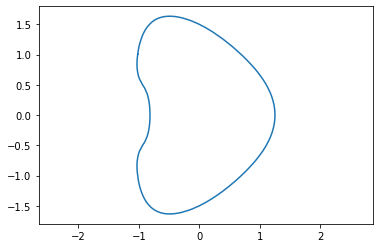

In [3]:
Rmed, Zmed = data.T
R0M = 0.14 # MEDUSA major radius 
am = R0M/1.32 #MEDUSA minor radius

def cil3dtocart2d(Rmed, Zmed, R0M, am):
    """
    Cilindrical (R,Z) to cartesian (x,y) coordinate transformation.
    """
    rmed = Rmed-R0M
    xmed = rmed/am
    ymed = Zmed/am
    thtmed = np.arctan2(Zmed,rmed)
    Rm = np.sqrt(xmed**2+ymed**2)
    
    return np.array([xmed, ymed]), Rm, thtmed

xypoints, Rm, thtmed = cil3dtocart2d(Rmed, Zmed, R0M, am)

datas = np.array([Rmed, Zmed, thtmed, Zmed])
plt.axes().set_aspect('equal', 'datalim')
plt.plot(xypoints[0], xypoints[1])

In [6]:
#Psi = 0.001*np.random.rand(Nt,Np)
#Psi[:,-1]= 0.01
#Psi[:,0] = 0
P_profile = lambda r: .17/(0.011+(r-0.15)**2)**2
#I_profile = lambda r: .15/(0.01+(r-0.15)**2)**2

# Ideal/possible pressure profiles in MEDUSA tokamak 


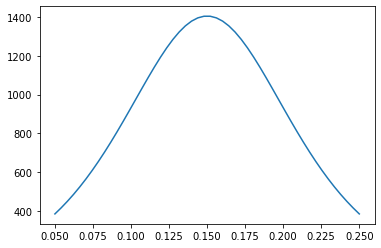

In [7]:
R = np.linspace(0.05, 0.25)

P = P_profile(R)
plt.plot(R, P)

In [25]:
from scipy.optimize import minimize

#toroidal current density

R, Z, J = np.loadtxt('PuntosJ.txt', skiprows = 1, delimiter=',').T #loads J(R,Z) data

coefs = np.random.rand(6) # initiates coefficients of the power series

powerseries = lambda r, a: np.sum([a[i]*(r/am)**i for i in range(len(a))], axis=0) #power series function

def square_error(coefs, R, J):
    """
    Mean square error for coefficient fit
    """
    err = 1/len(R)*(J - powerseries(R, coefs))**2 
    return np.sum(err)

res = minimize(square_error, coefs ,args = (R, J), method='BFGS', tol=1e-4) 



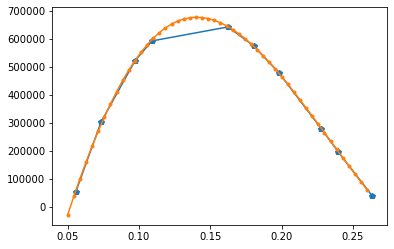

In [26]:
#Current profile plot

r = np.linspace(0.05, 0.26)
sol = powerseries(r, res.x)
plt.plot(R,J, marker='p')
plt.plot(r, sol, marker='.')
